## Gather and Clean Data

In [ ]:
'''
Reviews on the Google Play store are available but require clicking on "READ ALL REVIEWS" a few times.
'''

In [15]:
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import requests
import re
import os

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 100

In [2]:
chromedriver = "/Users/laura.borton/Documents/python_stuff/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)

In [5]:
driver.get("https://play.google.com/store/apps/details?id=com.stela.comics_unlimited&showAllReviews=true")

In [99]:
google = []
for i in range (1,296):
                
    #star
    job_xpath= '//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div[1]/div/div/div[1]/div[2]/div/div[{}]/div/div[2]/div[2]/span[1]'.format(i)
    job= driver.find_element_by_xpath(job_xpath).text      
    google.append(job)
    #text
    job_xpath= '//*[@id="fcxH9b"]/div[4]/c-wiz/div/div[2]/div/div[1]/div/div/div[1]/div[2]/div/div[{}]/div/div[2]/div[1]/div[1]/div/span[1]/div/div'.format(i)
    job= driver.find_element_by_xpath(job_xpath).get_attribute("aria-label")
    google.append(job) 

In [107]:
len(google)

590

In [114]:
google [0:10]

['Great story',
 'Rated 5 stars out of five stars',
 'It is awesome',
 'Rated 4 stars out of five stars',
 'these stories look amazing but i have to pay for them',
 'Rated 5 stars out of five stars',
 'WORD.',
 'Rated 5 stars out of five stars',
 "Meh. Not that great. Now that I finished reading all of the stories in a just about two week, there's nothing else to look forward to. not enough stories to keep me subscribed. other apps out there have more stories and are free.",
 'Rated 1 stars out of five stars']

In [117]:
df = pd.DataFrame(google)
df.head()

,0
0,Great story
1,Rated 5 stars out of five stars
2,It is awesome
3,Rated 4 stars out of five stars
4,these stories look amazing but i have to pay f...


In [ ]:
pd.DataFrame(google).to_csv('google.csv')

In [109]:
driver.close()

In [23]:
#putting the reviews in one column and the ratings in another (dataframe from dictionary)
dfrev = pd.DataFrame({'review':df[0].iloc[::2].values, 'rating':df[0].iloc[1::2].values})
dfrev.head()

,review,rating
0,Great story,Rated 5 stars out of five stars
1,It is awesome,Rated 4 stars out of five stars
2,these stories look amazing but i have to pay f...,Rated 5 stars out of five stars
3,WORD.,Rated 5 stars out of five stars
4,Meh. Not that great. Now that I finished readi...,Rated 1 stars out of five stars


In [167]:
#Only want numbers from ratings column
dfrev['star'] = dfrev['rating'].str.extract('(\d+)').astype(int)
dfrev.head()

,review,rating,star
0,Great story,Rated 5 stars out of five stars,5
1,It is awesome,Rated 4 stars out of five stars,4
2,these stories look amazing but i have to pay f...,Rated 5 stars out of five stars,5
3,WORD.,Rated 5 stars out of five stars,5
4,Meh. Not that great. Now that I finished readi...,Rated 1 stars out of five stars,1


In [174]:
# Split good reviews (4 and 5 stars) and bad reviews (1 and 2 stars)
good = dfrev.loc[dfrev['star'].isin([4,5])]
bad = dfrev.loc[dfrev['star'].isin([1,2])]
print(bad.head())
print(good.tail())

                                               review  \
4   Meh. Not that great. Now that I finished readi...   
6   you:*clicks on a story you wanna read* first c...   
7    wish the free trail didnt need a card or nothing   
13  Omg not any more it more like we sorry will it...   
17  PATHETIC!!!! i hate this app!!!! you have to p...   

                             rating  star  
4   Rated 1 stars out of five stars     1  
6   Rated 1 stars out of five stars     1  
7   Rated 2 stars out of five stars     2  
13  Rated 1 stars out of five stars     1  
17  Rated 1 stars out of five stars     1  
                                                review  \
286              Love the compeling arts. Please more!   
287                            Brilliant storytelling!   
292  Stela is a unique way to view comics. The grap...   
293  It requires payment but it is also not like ot...   
294  Awesome comic reading platform. Highly recomme...   

                              rating  star  

### To import scraped file

In [4]:
df = pd.read_csv ('google.csv')
df.head()

,Unnamed: 0,0
0,0,Great story
1,1,Rated 5 stars out of five stars
2,2,It is awesome
3,3,Rated 4 stars out of five stars
4,4,these stories look amazing but i have to pay f...


In [28]:
df.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [5]:
#putting the reviews in one column and the ratings in another (dataframe from dictionary) 
#changing 0 to string '0'
dfrev = pd.DataFrame({'review':df['0'].iloc[::2].values, 'rating':df['0'].iloc[1::2].values})
dfrev.head()

,review,rating
0,Great story,Rated 5 stars out of five stars
1,It is awesome,Rated 4 stars out of five stars
2,these stories look amazing but i have to pay f...,Rated 5 stars out of five stars
3,WORD.,Rated 5 stars out of five stars
4,Meh. Not that great. Now that I finished readi...,Rated 1 stars out of five stars


In [6]:
#Only want numbers from ratings column
dfrev['star'] = dfrev['rating'].str.extract('(\d+)').astype(int)

# Split good reviews (4 and 5 stars) and bad reviews (1 and 2 stars)
good = dfrev.loc[dfrev['star'].isin([4,5])]
bad = dfrev.loc[dfrev['star'].isin([1,2])]
print(bad.head())
print(good.tail())

                                               review  \
4   Meh. Not that great. Now that I finished readi...   
6   you:*clicks on a story you wanna read* first c...   
7    wish the free trail didnt need a card or nothing   
13  Omg not any more it more like we sorry will it...   
17  PATHETIC!!!! i hate this app!!!! you have to p...   

                             rating  star  
4   Rated 1 stars out of five stars     1  
6   Rated 1 stars out of five stars     1  
7   Rated 2 stars out of five stars     2  
13  Rated 1 stars out of five stars     1  
17  Rated 1 stars out of five stars     1  
                                                review  \
286              Love the compeling arts. Please more!   
287                            Brilliant storytelling!   
292  Stela is a unique way to view comics. The grap...   
293  It requires payment but it is also not like ot...   
294  Awesome comic reading platform. Highly recomme...   

                              rating  star  

## NLP

In [11]:
from gensim.utils import simple_preprocess

import nltk
from nltk.corpus import stopwords
from nltk.util import bigrams
from nltk import FreqDist, Text
from nltk.stem import PorterStemmer
from collections import Counter
import operator
import matplotlib.pyplot as plt

In [8]:
Google_good = good['review']
Google_bad = bad['review']

In [19]:
def sentiment (review_df):

    t = review_df.str.cat(sep=' ')
    stop_words = stopwords.words('english') 
    
    def remove_stopwords(texts):
        return [word for word in simple_preprocess(str(texts)) if word not in stop_words] 

    words_nostops = remove_stopwords(t)
    words_bigrams = (list(bigrams(words_nostops)))
    words = words_nostops + words_bigrams

    def get_afinn_scores(file = 'AFINN-en-165.txt'): 
        afinn_file = open(file)
        scores = {}
        for line in afinn_file:
          term, score  = line.split("\t")
          scores[term] = int(score)
        return scores

    afinn_scores = get_afinn_scores()
    pos=[]
    for word in words:
        if word in afinn_scores and afinn_scores[word] > 0:
            pos.append(word)

    neg=[]
    for word in words:
        if word in afinn_scores and afinn_scores[word] < 0:
            neg.append(word)

    posneg = pos + neg

    count_pos = Counter(pos)
    count_neg = Counter(neg)
    count_posneg = Counter(posneg)

    freq_pos = {k: v for k,v in count_pos.items() if v > 1}
    freq_neg = {k: v for k,v in count_neg.items() if v > 1}
    freq_posneg = {k: v for k,v in count_posneg.items() if v > 1}

    sorted_freq_pos = dict( sorted(freq_pos.items(), key=operator.itemgetter(1),reverse=False))
    sorted_freq_neg = dict( sorted(freq_neg.items(), key=operator.itemgetter(1),reverse=False))
    sorted_freq_posneg = dict( sorted(freq_posneg.items(), key=operator.itemgetter(1),reverse=False))
    return [sorted_freq_pos, sorted_freq_neg, sorted_freq_posneg]
    

In [20]:
Google_good_sentiment = sentiment(Google_good)
Google_good_pos = Google_good_sentiment[0]
Google_good_neg = Google_good_sentiment[1]
Google_good_posneg = Google_good_sentiment[2]


In [21]:
Google_bad_sentiment = sentiment(Google_bad)
Google_bad_pos = Google_bad_sentiment[0]
Google_bad_neg = Google_bad_sentiment[1]
Google_bad_posneg = Google_bad_sentiment[2]


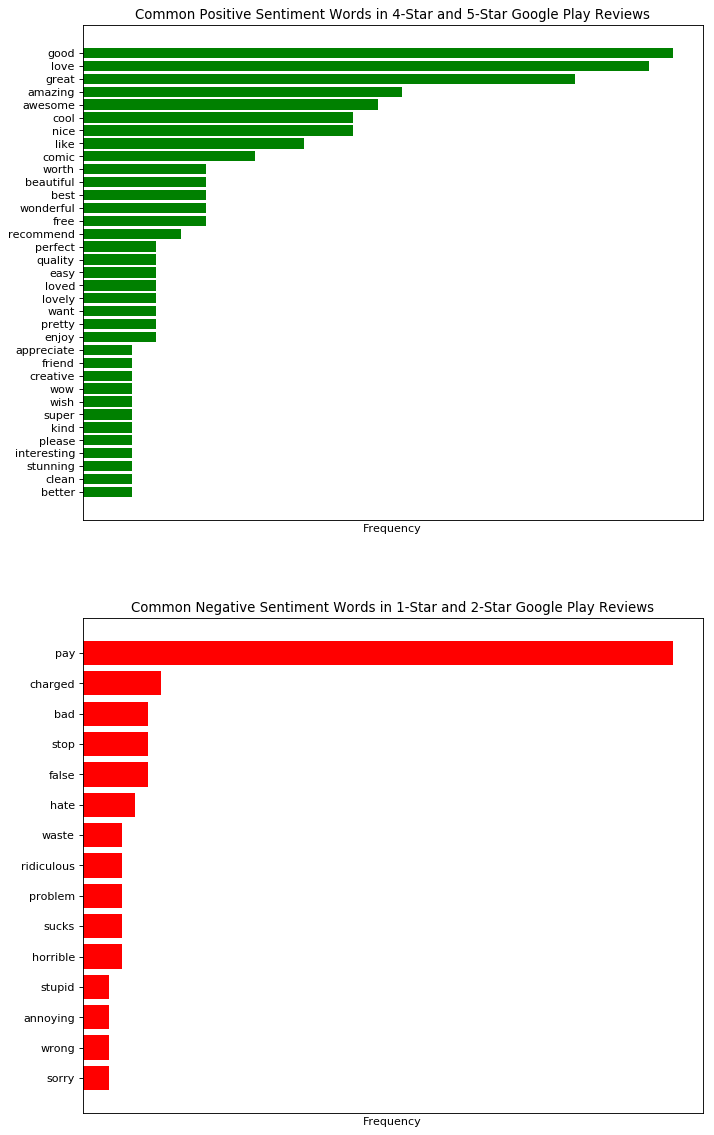

In [30]:
#All to get the axes the same 
#height_posneg = list(Google_good_posneg.values())
#bars_posneg = list(Google_good_posneg.keys())
#y_posneg = np.arange(len(bars_posneg))

#Good_pos
height_pos = list(Google_good_pos.values())
bars_pos = list(Google_good_pos.keys())
y_pos = np.arange(len(bars_pos))

#Bad_pos
height_neg = list(Google_bad_neg.values())
bars_neg = list(Google_bad_neg.keys())
y_neg = np.arange(len(bars_neg))

#indices to get the y values/position of each list
#idp = [ bars_posneg.index(b) for b in bars_pos ]
#ign = [ bars_posneg.index(b) for b in bars_neg ]

#Make plot bigger than default
plt.figure (figsize=(10, 18), dpi= 80)

plt.figure(1)
plt.subplot(211)

# Create horizontal bars
plt.barh(y_pos, height_pos, color = 'green', label = 'Positive Sentiment')
# Create names on the y-axis
plt.yticks(y_pos, bars_pos)
plt.xticks([])
plt.xlabel ('Frequency')
plt.title('Common Positive Sentiment Words in 4-Star and 5-Star Google Play Reviews')
#plt.legend()

plt.subplot(212)
plt.barh(y_neg, height_neg, color = 'red', label = 'Negative Sentiment')
# Create names on the y-axis
plt.yticks(y_neg, bars_neg)
plt.xticks([])
plt.xlabel ('Frequency')
plt.title('Common Negative Sentiment Words in 1-Star and 2-Star Google Play Reviews')

#plt.legend()

# Show graphic
plt.show()

In [23]:
list(Google_good_posneg.keys())

['better',
 'clean',
 'stunning',
 'interesting',
 'please',
 'kind',
 'super',
 'wish',
 'wow',
 'creative',
 'friend',
 'appreciate',
 'enjoy',
 'pretty',
 'want',
 'lovely',
 'loved',
 'easy',
 'quality',
 'perfect',
 'blah',
 'recommend',
 'free',
 'wonderful',
 'best',
 'beautiful',
 'worth',
 'comic',
 'pay',
 'like',
 'nice',
 'cool',
 'awesome',
 'amazing',
 'great',
 'love',
 'good']

### Getting word count chart without afinn 

In [39]:
#https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/explore_data.py

"""Module to explore data.
Contains functions to help study, visualize and understand datasets.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=90)
    plt.show()


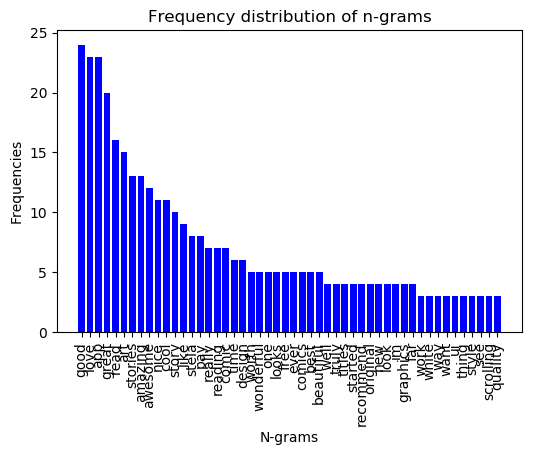

In [40]:
plot_frequency_distribution_of_ngrams(words_nostops)